In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

In [2]:
# reading cvs files to pandas dataframes
cityData = pd.read_csv("raw_data/city_data.csv")
rideData = pd.read_csv("raw_data/ride_data.csv")

# clean city data frame 
cityDataClean = pd.DataFrame({'type': cityData.groupby('city').first()['type'],
                                'driver_count':cityData.groupby('city').sum()['driver_count']}).reset_index()

uberData = pd.merge(rideData, cityDataClean, on="city")

#display the first five rows in Uber Data Frame
uberData.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


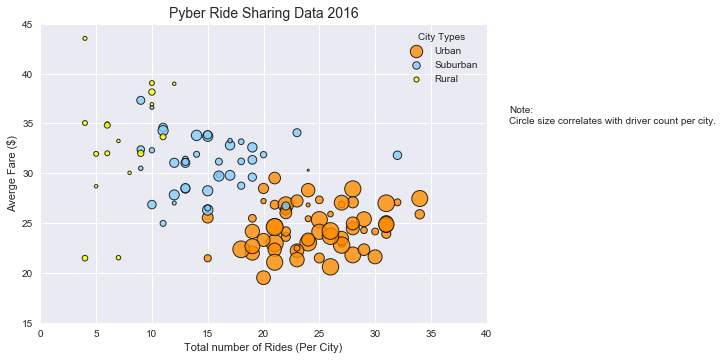

In [7]:
#create data frame for Average Fare ($) Per City
avergeFare = pd.DataFrame(uberData.groupby('city')["fare"].mean())
avergeFare = avergeFare.reset_index()

#create data frame for Total Number of Rides Per City
totalRides = pd.DataFrame(uberData.groupby('city')["ride_id"].count())
totalRides = totalRides.reset_index()

#Total Number of Drivers Per City
totalDrivers = cityDataClean.loc[:,('city', "driver_count")]

#City Type (Urban, Suburban, Rural)
cityType = cityDataClean.loc[:,('city', "type")]

# create main data frame for Uber Data
UberDFs = [avergeFare, totalRides, totalDrivers, cityType]

UberData = pd.concat([DF.set_index("city") for DF in UberDFs], axis=1)
UberData.reset_index()
UberData.rename(columns = {"fare":"Averge Fare", "ride_id":"Number of Rides",
                          "driver_count":"Number of Drivers", "type":"City Type"}, 
                           inplace= True)


# create data frames based on city type
urbanData = UberData.loc[(UberData["City Type"] == "Urban"),:]
suburbanData = UberData.loc[(UberData["City Type"] == "Suburban"),:]
rularData = UberData.loc[(UberData["City Type"] == "Rural"),:]

# plotting 3 scatter plots based on city type
plt.scatter(x= urbanData["Number of Rides"], y= urbanData["Averge Fare"],label= "Urban",
            c="darkorange", edgecolor='black', lw=1, alpha=0.8, s= np.array(urbanData["Number of Drivers"]*4))
plt.scatter(x= suburbanData["Number of Rides"], y= suburbanData["Averge Fare"],label= "Suburban",
            c="lightskyblue", edgecolor='black', lw=1, alpha=0.8, s= np.array(suburbanData["Number of Drivers"]*4))
plt.scatter(x= rularData["Number of Rides"], y= rularData["Averge Fare"],label= "Rural", 
            c="yellow", edgecolor='black', lw=1, alpha=0.8, s= np.array(rularData["Number of Drivers"]*4) )
 
# adding the required limit, style, title, legend, and text
plt.xlim(0, 40)
plt.ylim(15,45)
plt.title("Pyber Ride Sharing Data 2016" , fontsize= 14)
plt.xlabel("Total number of Rides (Per City)")
plt.ylabel("Averge Fare ($)")
plt.legend(title= "City Types")
mpl.style.use("seaborn")
plt.text(42,35,"Note:\nCircle size correlates with driver count per city.")
plt.savefig("BubbleChart.png")

#display the final plot

plt.show()

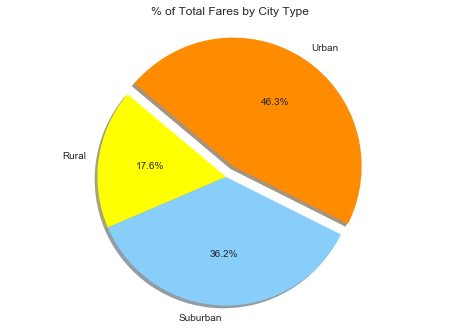

In [4]:
# Pie Chart for Total Fares by City Type

FareData = UberData.groupby("City Type")["Averge Fare"].sum()
FareData = pd.DataFrame(FareData)
FareData = FareData.reset_index()

cols =["yellow","lightskyblue","darkorange"]

plt.pie(FareData["Averge Fare"], labels=FareData["City Type"], autopct= '%1.1f%%',
        colors =  cols  , explode= (0,0,0.1), shadow=True, startangle=140)

plt.title("% of Total Fares by City Type")
plt.axis("equal")
plt.savefig("FaresPie.png")
plt.show()

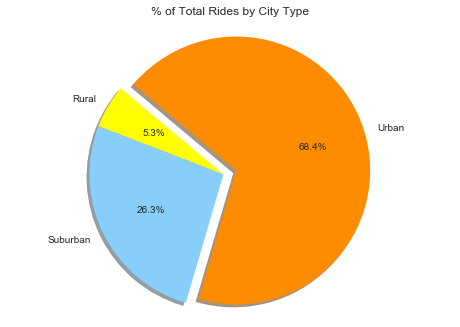

In [5]:
# Pie Chart for Total Rides by City Type

RidesData = UberData.groupby("City Type")["Number of Rides"].sum()
RidesData = pd.DataFrame(RidesData)
RidesData = RidesData.reset_index()

cols =["yellow","lightskyblue","darkorange"]

plt.pie(RidesData["Number of Rides"], labels=RidesData["City Type"], autopct= '%1.1f%%',
        colors =  cols  , explode= (0,0,0.1), shadow=True, startangle=140  )

plt.title("% of Total Rides by City Type")
plt.axis("equal")
plt.savefig("RidesPie.png")

plt.show()


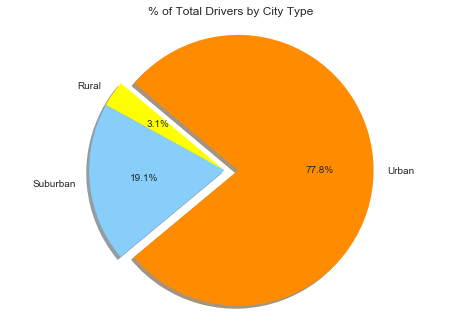

In [6]:
# Pie Chart for Total Drivers by City Type

DriversData = UberData.groupby("City Type")["Number of Drivers"].sum()
DriversData = pd.DataFrame(DriversData)
DriversData = DriversData.reset_index()

cols =["yellow","lightskyblue","darkorange"]

plt.pie(DriversData["Number of Drivers"], labels=DriversData["City Type"], autopct= '%1.1f%%',
        colors =  cols  , explode= (0,0,0.1), shadow=True, startangle=140 )

plt.title("% of Total Drivers by City Type")
plt.axis("equal")
plt.savefig("DriversPie.png")

plt.show()
